# About Dataset ```train_agriculture.xlsx```

The dataset is in .xlsx (Microsoft Excel) format and consists of ```4599 rows``` with ```10 features``` as explained below:
1. ```ID```: Unique ID
2. ```Estimated_Insects_Count```: Estimated insects count per square meter.
3. ```Crop_Type```: Category of crop (0 or 1).
4. ```Soil_Type```: Category of soil (0 or 1).
5. ```Pesticide_Use_Category```: Types of pesticide uses (1-Never, 2-Previously Used, 3-Currently Using).
6. ```Number_Doses_Week```: Number of doses per week.
7. ```Number_Weeks_Used```: Number of weeks used.
8. ```Number_Weeks_Quit```: Number of weeks quit.
9. ```Season```: Season category (1 or 2 or 3).
10. ```Crop_Damage```: Crop damage category (0-Alive, 1-Damage due to other causes, 2-Damage due to pesticides).
> Since, the target ```Crop_Damage``` is of **categorical type**, therefore, it is a **classification problem**.

# Loading Dataset

In [1]:
import pandas as pd
df_ag = pd.read_excel('train_agriculture.xlsx',sheet_name='Sheet1')

#Interpreting dataset
df_ag

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [2]:
#Checking Dimension
df_ag.shape

(4599, 10)

# Preparing Dataset

In [3]:
import numpy as np
#Checking for null values in features.
df_ag.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

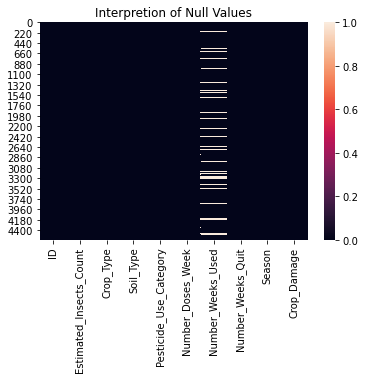

In [4]:
#Interpreting null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_ag.isnull())
plt.title("Interpretion of Null Values")
plt.show()

### Remarks:
- Null values are present in feature **```Number_Weeks_Used```** and needs to be treated accordingly.

In [5]:
#Checking for unique values in Number_Weeks_Used
df_ag['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [6]:
#Replacing the NaN value by mean value
df_ag['Number_Weeks_Used'].replace(np.nan,df_ag['Number_Weeks_Used'].mean(),inplace=True)

In [7]:
#Checking general information of dataset
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


### Remarks:
- No Null values are present
- There are **9 continueous and 1 descrete type feature** present which needs to be encoded.

In [8]:
#Checking for unique values in descrete feature ID
df_ag['ID'].nunique()

4599

### Remarks:
- Since, feature **```ID``` contains 4599 unique values which is equal to the total number of records in dataset**, therefore, **no need of encoding** and hence, this **feature can be dropped** from dataset.

In [9]:
#Dropping feature ID
df = df_ag.drop(columns=['ID'])

#Printing first 5 rows of new df
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


# Statistical Summary

In [10]:
#Checking statistical summary of data
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


### Remarks:
- ```count``` for all the columns are same, therefore, **no null values present.**
- ```mean``` is greater than ```50% (median)``` in ```Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit```, therefore, **data might be right skewed**.
- ```std (Standard Deviation)``` is higher in ```Estimated_Insects_Count```, therefore, **data might be spreaded**.
- Difference between ```75% and max``` is higher in ```Estimated_Insects_Count```, therefore, **outliers may be present**.

# Exploratory Data Analysis

## Univariate Analysis

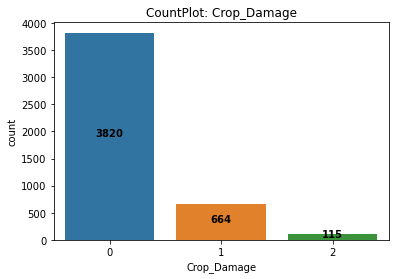

In [11]:
#Checking target feature Crop_Damage using countplot
x = 'Crop_Damage'
ax=sns.countplot(df[x])
k=0
for i in ax.patches:
    h = i.get_height()
    plt.text(k,h/2,h,color='k',ha='center',fontweight='bold')
    k += 1
    
plt.title(f"CountPlot: {x}")
plt.show()

### Remarks:
- Maximum number of observations are for ```Crop_Damage 0``` and minimum are for ```Crop_Damage 2```.

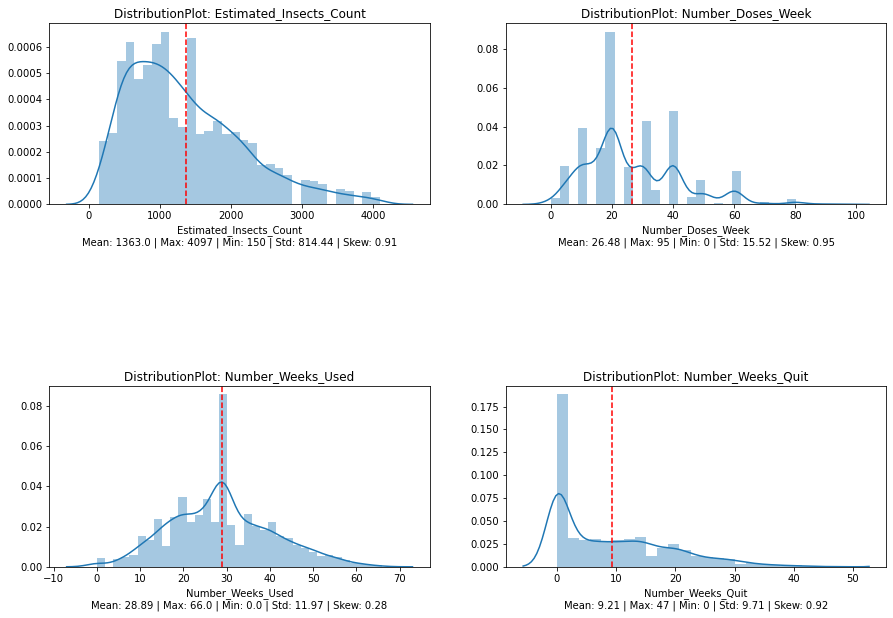

In [12]:
#Checking distribution of data in continueos features
con_feature = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=1)
k=1
for x in con_feature:
    axes = fig.add_subplot(2,2,k)
    sns.distplot(df[x],ax=axes)
    axes.set_title(f"DistributionPlot: {x}")
    me = round(df[x].mean(),2)
    ma = round(df[x].max(),2)
    mi = round(df[x].min(),2)
    st = round(df[x].std(),2)
    sk = round(df[x].skew(),2)
    axes.set_xlabel(f"{x}\nMean: {me} | Max: {ma} | Min: {mi} | Std: {st} | Skew: {sk}")
    plt.axvline(me,linestyle='--',color='r')
    k += 1
    
plt.show()

### Remarks:
```for Estimated_Insects_Count```:
- Data is **not distributed normally** or in well curve.
- Data is a bit **right skewed** and needs to be treated accordingly.
- Most of the **data lies between 500 to 2100.**

```for Number_Doses_Week```:
- Data is **not distributed normally** or in well curve.
- Data is a bit **right skewed** and needs to be treated accordingly.
- Most of the **data lies between 10 to 40.**

```for Number_Weeks_Used```:
- Data is **somewhat distributed normally** but not in well curve.
- Data is **neglegiably right skewed**.
- Most of the **data lies between 17 to 40.**

```for Number_Weeks_Quit```:
- Data is **not distributed normally** or in well curve.
- Data is a bit **right skewed** and needs to be treated accordingly.
- Most of the **data lies between 0 to 18.**

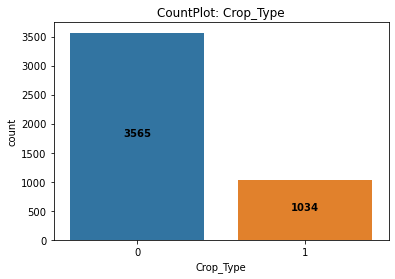

In [13]:
#Checking feature Crop_Type using countplot
x = 'Crop_Type'
ax=sns.countplot(df[x])
k=0
for i in ax.patches:
    h = i.get_height()
    plt.text(k,h/2,h,color='k',ha='center',fontweight='bold')
    k += 1
    
plt.title(f"CountPlot: {x}")
plt.show()

### Remarks:
- ```Crop_Type 0``` has higher number of observation with **3565** as compared to ```Crop_Type 1``` which **1034** observations.

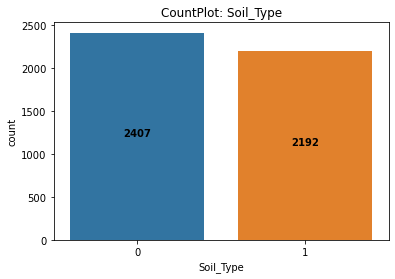

In [14]:
#Checking feature Soil_Type using countplot
x = 'Soil_Type'
ax=sns.countplot(df[x])
k=0
for i in ax.patches:
    h = i.get_height()
    plt.text(k,h/2,h,color='k',ha='center',fontweight='bold')
    k += 1
    
plt.title(f"CountPlot: {x}")
plt.show()

### Remarks:
- ```Soil_Type 0``` has higher number of observation with **2407** as compared to ```Soil_Type 1``` which **2192** observations.

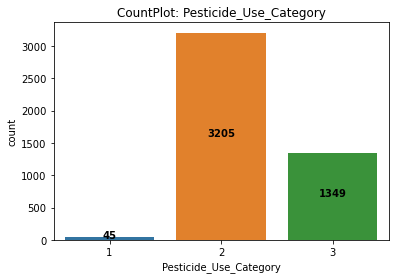

In [15]:
#Checking feature Pesticide_Use_Category using countplot
x = 'Pesticide_Use_Category'
ax=sns.countplot(df[x])
k=0
for i in ax.patches:
    h = i.get_height()
    plt.text(k,h/2,h,color='k',ha='center',fontweight='bold')
    k += 1
    
plt.title(f"CountPlot: {x}")
plt.show()

### Remarks:
- ```Pesticide_Use_Category 2``` has maximum number of observation.
- ```Pesticide_Use_Category 1``` has minimum number of observation.

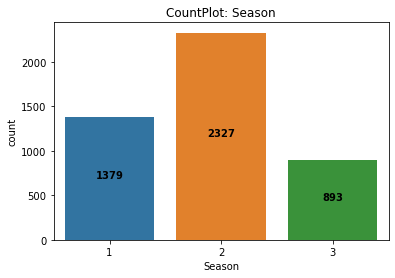

In [16]:
#Checking feature Season using countplot
x = 'Season'
ax=sns.countplot(df[x])
k=0
for i in ax.patches:
    h = i.get_height()
    plt.text(k,h/2,h,color='k',ha='center',fontweight='bold')
    k += 1
    
plt.title(f"CountPlot: {x}")
plt.show()

### Remarks:
- ```Season 2``` has maximum number of observation.
- ```Season 3``` has minimum number of observation.

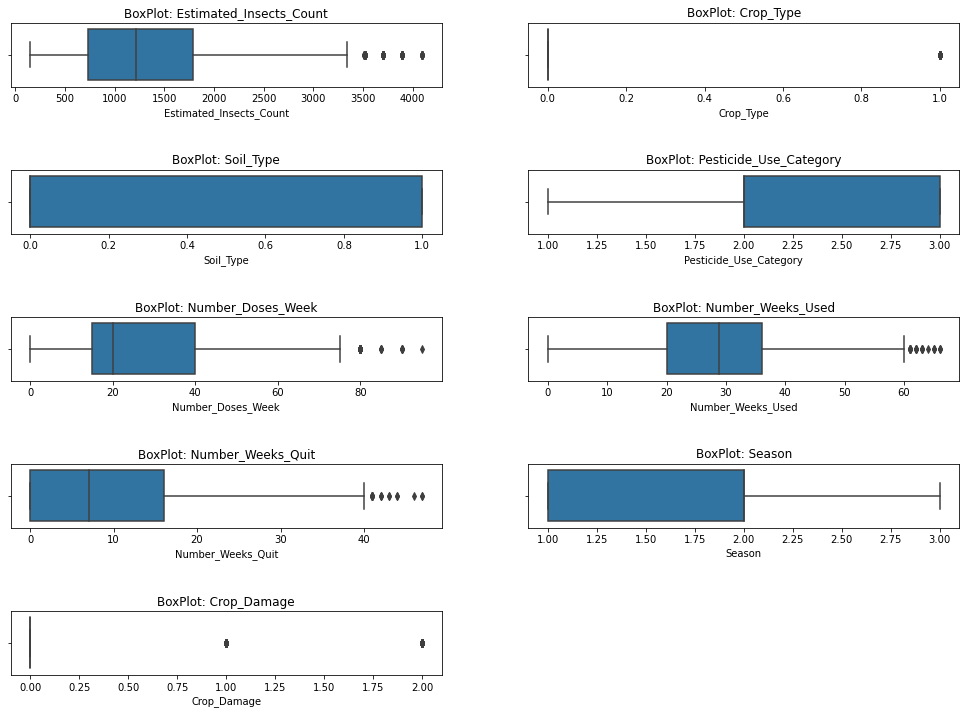

In [17]:
#Checking features using boxplot
cols=2
rows = len(df.columns)//cols
if len(df.columns) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(17,12))
plt.subplots_adjust(hspace=1.3)
k=1
for x in df.columns:
    axes = fig.add_subplot(rows,cols,k)
    sns.boxplot(df[x],ax=axes)
    axes.set_title(f"BoxPlot: {x}")
    k += 1
    
plt.show()

### Remarks:
- Some or more **outliers are present** in feature ```Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used, Number_Weeks_Quit``` and needs to be treated accordingly. 

## Bi-Variate Analysis

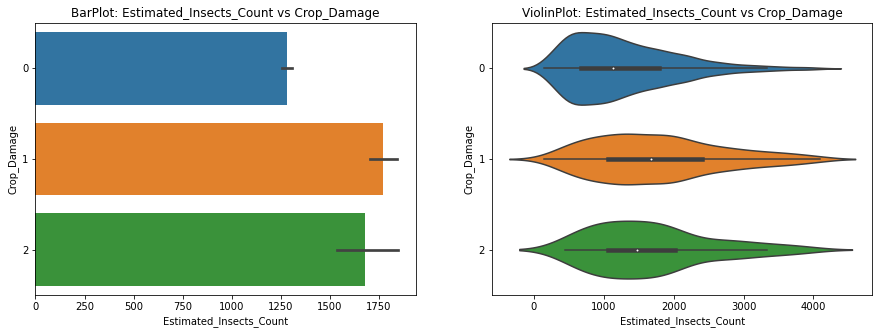

In [18]:
#Checking feature Estimated_Insects_Count w.r.t Crop_Damage
x = 'Estimated_Insects_Count'
y = 'Crop_Damage'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#Barplot
sns.barplot(x,y,data=df,ax=ax1,orient='h')
ax1.set_title(f"BarPlot: {x} vs {y}")

#Violinplot
sns.violinplot(x,y,data=df,ax=ax2,orient='h')
ax2.set_title(f"ViolinPlot: {x} vs {y}")
plt.show()

### Remarks:
- **Maximum** number of ```Estimated_Insects_Count``` is for ```Crop_Damage 1``` and **Minimum** is for ```Crop_Damage 0```.
- **Majority** of ```Estimated_Insects_Count``` is for ```Crop_Damage 1 and 2```.
- Most of the ```Estimated_Insects_Count``` for ```Crop_Damage 0``` lies between **700 to 1850**.
- Most of the ```Estimated_Insects_Count``` for ```Crop_Damage 1``` lies between **1050 to 2500**.
- Most of the ```Estimated_Insects_Count``` for ```Crop_Damage 2``` lies between **1050 to 2000**.

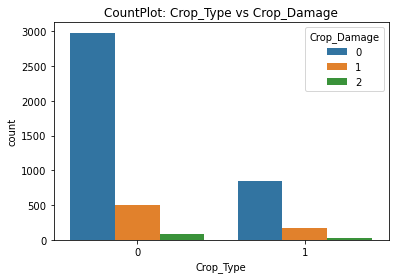

Crop_Damage,0,1,2
Crop_Type,,,
0,2979,498,88
1,841,166,27


In [19]:
#Checking feature Crop_Type w.r.t Crop_Damage using countplot
x = 'Crop_Type'
y = 'Crop_Damage'

sns.countplot(x,hue=y,data=df)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#Checking with crosstab
pd.crosstab(df[x],df[y])

### Remarks:
- ```Crop_Damage 0``` is **higher** in both ```Crop_Type 0 and 1``` as compared to ```Crop_Damage 1 and 2```.
- ```Crop_Damage 2``` is **lower** in both ```Crop_Type 0 and 1``` as compared to ```Crop_Damage 0 and 1```.

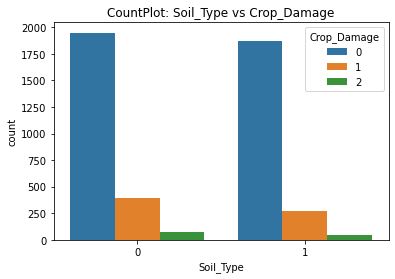

Crop_Damage,0,1,2
Soil_Type,,,
0,1947,390,70
1,1873,274,45


In [20]:
#Checking feature Soil_Type w.r.t Crop_Damage using countplot
x = 'Soil_Type'
y = 'Crop_Damage'

sns.countplot(x,hue=y,data=df)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#Checking with crosstab
pd.crosstab(df[x],df[y])

### Remarks:
- ```Crop_Damage 0``` is **higher** in both ```Soil_Type 0 and 1``` as compared to ```Crop_Damage 1 and 2```.
- ```Crop_Damage 2``` is **lower** in both ```Soil_Type 0 and 1``` as compared to ```Crop_Damage 0 and 1```.

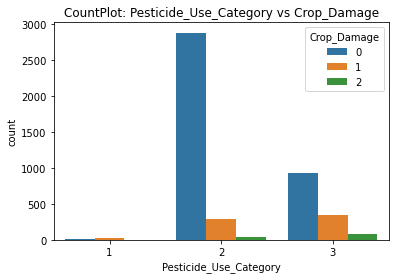

Crop_Damage,0,1,2
Pesticide_Use_Category,,,
1,7,33,5
2,2881,290,34
3,932,341,76


In [21]:
#Checking feature Pesticide_Use_Category w.r.t Crop_Damage using countplot
x = 'Pesticide_Use_Category'
y = 'Crop_Damage'

sns.countplot(x,hue=y,data=df)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#Checking with crosstab
pd.crosstab(df[x],df[y])

### Remarks:
- **Most** of the observations are for ```Pesticide_Use_Category 2``` and **least** are of ```Pesticide_Use_Category 1```.
- ```Crop_Damage 0``` is **higher** in ```Pesticide_Use_Category 2 and 3``` and **lower** in ```Pesticide_Use_Category 1``` as compared to ```Crop_Damage 1 and 2```.
- ```Crop_Damage 1``` is **higher** in ```Pesticide_Use_Category 1``` as compared to ```Crop_Damage 1 and 2```.

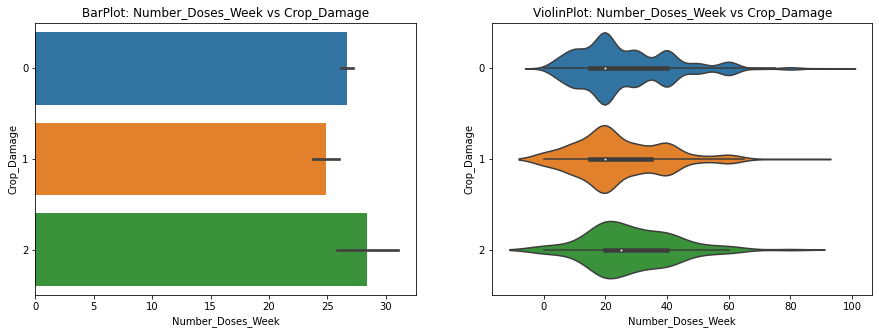

In [22]:
#Checking feature Number_Doses_Week w.r.t Crop_Damage
x = 'Number_Doses_Week'
y = 'Crop_Damage'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#Barplot
sns.barplot(x,y,data=df,ax=ax1,orient='h')
ax1.set_title(f"BarPlot: {x} vs {y}")

#Violinplot
sns.violinplot(x,y,data=df,ax=ax2,orient='h')
ax2.set_title(f"ViolinPlot: {x} vs {y}")
plt.show()

### Remarks:
- **Maximum** number of ```Number_Doses_Week``` is for ```Crop_Damage 2``` and **Minimum** is for ```Crop_Damage 1```.
- **Majority** of ```Number_Doses_Week``` is for ```Crop_Damage 0 and 2```.
- Most of the ```Number_Doses_Week``` for ```Crop_Damage 0``` lies between **18 to 40**.
- Most of the ```Number_Doses_Week``` for ```Crop_Damage 1``` lies between **18 to 35**.
- Most of the ```Number_Doses_Week``` for ```Crop_Damage 2``` lies between **20 to 40**.

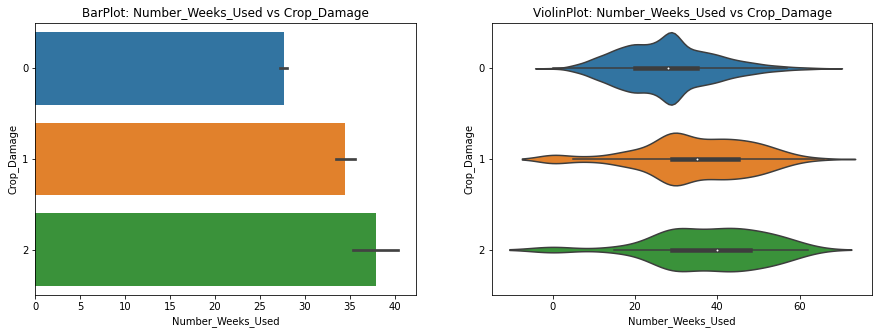

In [23]:
#Checking feature Number_Weeks_Used w.r.t Crop_Damage
x = 'Number_Weeks_Used'
y = 'Crop_Damage'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#Barplot
sns.barplot(x,y,data=df,ax=ax1,orient='h')
ax1.set_title(f"BarPlot: {x} vs {y}")

#Violinplot
sns.violinplot(x,y,data=df,ax=ax2,orient='h')
ax2.set_title(f"ViolinPlot: {x} vs {y}")
plt.show()

### Remarks:
- **Maximum** number of ```Number_Weeks_Used``` is for ```Crop_Damage 2``` and **Minimum** is for ```Crop_Damage 0```.
- **Majority** of ```Number_Weeks_Used``` is for ```Crop_Damage 1 and 2```.
- Most of the ```Number_Weeks_Used``` for ```Crop_Damage 0``` lies between **20 to 36**.
- Most of the ```Number_Weeks_Used``` for ```Crop_Damage 1``` lies between **30 to 46**.
- Most of the ```Number_Weeks_Used``` for ```Crop_Damage 2``` lies between **30 to 49**.

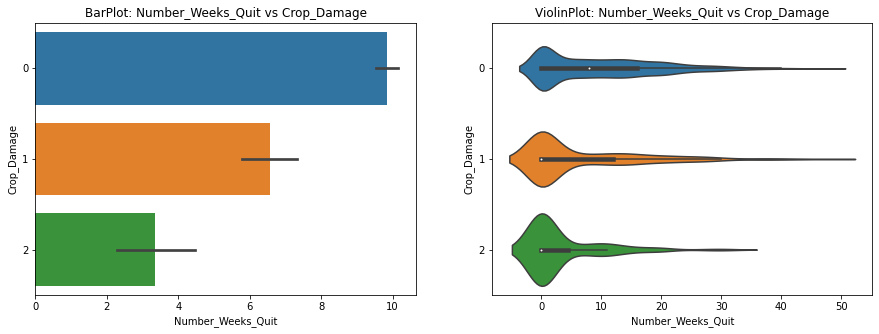

In [24]:
#Checking feature Number_Weeks_Quit w.r.t Crop_Damage
x = 'Number_Weeks_Quit'
y = 'Crop_Damage'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#Barplot
sns.barplot(x,y,data=df,ax=ax1,orient='h')
ax1.set_title(f"BarPlot: {x} vs {y}")

#Violinplot
sns.violinplot(x,y,data=df,ax=ax2,orient='h')
ax2.set_title(f"ViolinPlot: {x} vs {y}")
plt.show()

### Remarks:
- **Maximum** number of ```Number_Weeks_Quit``` is for ```Crop_Damage 0``` and **Minimum** is for ```Crop_Damage 2```.
- **Majority** of ```Number_Weeks_Quit``` is for ```Crop_Damage 0 and 1```.
- Most of the ```Number_Weeks_Quit``` for ```Crop_Damage 0``` lies between **0 to 16**.
- Most of the ```Number_Weeks_Quit``` for ```Crop_Damage 1``` lies between **0 to 12**.
- Most of the ```Number_Weeks_Quit``` for ```Crop_Damage 2``` lies between **0 to 5**.

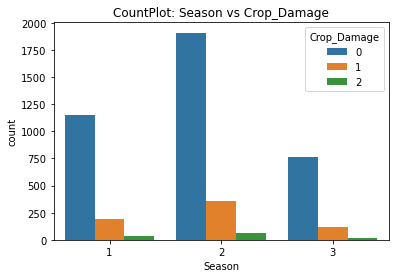

Crop_Damage,0,1,2
Season,,,
1,1150,192,37
2,1908,358,61
3,762,114,17


In [25]:
#Checking feature Season w.r.t Crop_Damage using countplot
x = 'Season'
y = 'Crop_Damage'

sns.countplot(x,hue=y,data=df)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#Checking with crosstab
pd.crosstab(df[x],df[y])

### Remarks:
- ```Crop_Damage 0``` is **higher** in all ```Season``` while ```Crop_Damage 2``` is **lower** in all ```Season```.

## Multi-Variate Analysis

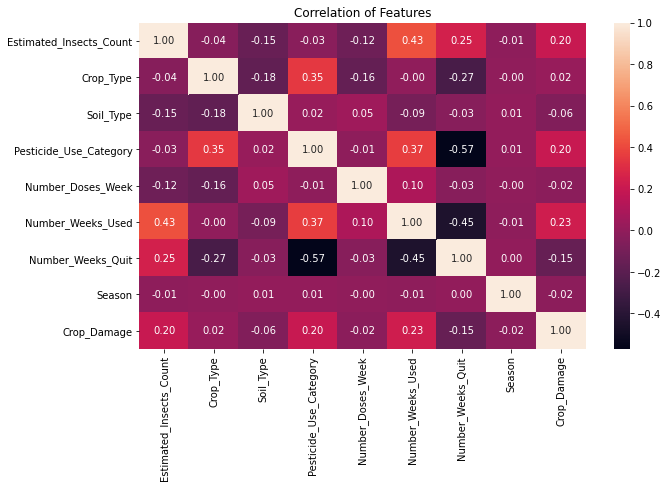

In [26]:
#Checking Correlation of features
df_corr = df.corr()

#Interpreting correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,fmt="0.2f")
plt.title("Correlation of Features")
plt.show()

### Remarks:
> Target `Crop_Damage` is **positively** correlated with feature `Number_Weeks_Used, Pesticide_Use_Category, Estimated_Insects_Count and Crop_Type` while **negatively** correlated with feature `Number_Weeks_Quit, Soil_Type, Number_Doses_Week and Season`.

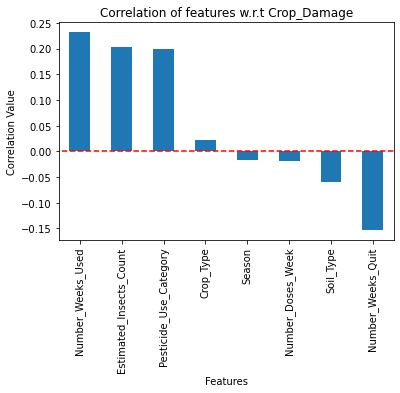

In [27]:
#Interpreting correlation of features w.r.t target Crop_Damage using bar plot
df_corr['Crop_Damage'].sort_values(ascending=False).drop('Crop_Damage').plot.bar()
plt.plot([-1,10],[0,0], 'r--')
plt.title("Correlation of features w.r.t Crop_Damage")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.show()

### Remarks:
> Feature `Number_Weeks_Used`, `Estimated_Insects_Count`, `Pesticide_Use_Category` and `Number_Weeks_Quit` has a **good** correlation with `Crop_Damage` while others have **weak** correlation with `Crop_Damage`.

# Preparing Data for Model

In [28]:
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, StandardScaler

## 1. Removing Outliers

In [29]:
#Checking outliers with the help of zscore (threshold value -3 to +3)
z = np.abs(zscore(df))

#Printing location of outliers
np.where(z>3)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
         167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
         264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
         374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
         557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
         819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
        1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
        1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
        1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
        2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
        2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
        2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
        2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
        2814, 2828, 2829, 2834, 2841, 

In [30]:
#Removing outliers with help of zscore
df_wo = df[(z<=3).all(axis=1)]

print(f"Original Shape: {df.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df)-len(df_wo))*100/len(df)}%")

Original Shape: (4599, 9)
New Shape: (4370, 9)
% Loss: 4.9793433355077195%


### Remarks:
> Since, the **% Loss of data is less than 5**, therefore, **proceeding with data without outliers**.

## 2. Seperating Input and Output/Target Variables

In [31]:
x = df_wo.drop(columns=['Crop_Damage']) #Input Variables
y = df_wo['Crop_Damage'] #Output/Target Variable

print(x.shape)
print(y.shape)

(4370, 8)
(4370,)


## 3. Skewness Treatment

In [32]:
#Checking skewness of data in contineous features of Input Variable (optimum value -0.5 to +0.5)
x[con_feature].skew()

Estimated_Insects_Count    0.789806
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
dtype: float64

In [33]:
#Treating features which have skewness more than -0.5 to +0.5
x_t = x.copy()
for i in con_feature:
    if np.abs(x_t[i].skew()) > 0.5:
        x_t[i] = power_transform(np.array(x[i]).reshape(-1,1))
        
#Re-Checking skewness in contineous features
x_t[con_feature].skew()

Estimated_Insects_Count   -0.041940
Number_Doses_Week         -0.017106
Number_Weeks_Used          0.275330
Number_Weeks_Quit         -0.105256
dtype: float64

### Remarks:
> **Skewness of data is treated and now are in range of -0.5 to +0.5**

## 4. Scaling Data for Model

In [34]:
#Scaling continueos features for model training
scaled_x = x_t.copy()

sc = StandardScaler()
for i in con_feature:
    scaled_x[i] = sc.fit_transform(np.array(x_t[i]).reshape(-1,1))

scaled_x.shape

(4370, 8)

# Finding Best Model

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
import timeit
#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_mScore = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_aScore = accuracy_score(y_test,predict_y)
        if temp_aScore>best_mScore:
            best_mScore = temp_aScore
            best_rState = i
                
    return best_rState,best_mScore


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        
        if i == 2:
            best_cvScore = temp_cvScore
            best_cv = i
            
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        print(f"Processing {i}...")
        
        #Start model building time
        start_time = timeit.default_timer()
        
        #Finding the best random_state for train test split
        best_rState, best_mScore = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #End model building time
        end_time = timeit.default_timer()
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        
        aScore = accuracy_score(y_test,predict_y)
        cMatrix = confusion_matrix(y_test,predict_y)
        cReport = classification_report(y_test,predict_y)
        
        #Storing metrics
        models[i]['initial_accuracy_score'] = best_mScore
        models[i]['accuracy_score'] = aScore
        models[i]['confusion_matrix'] = cMatrix
        models[i]['classification_report'] = cReport
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        models[i]['build_time'] = end_time - start_time
        
        print(f"\t-Completed (in {end_time-start_time}sec)\n")
    return models;

In [37]:
#Preparing List of Models and Testing them to get best model.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

#List of models with parameters
models = {
    "GaussianNB":{
        "name": GaussianNB(),
        "parameters": {
            "var_smoothing": [1e-9,1e-8]
        }
    },
    "SVC":{
        "name": SVC(),
        "parameters":{
            "kernel": ['linear','poly','rbf','sigmoid']           
        }
    },
    "RandomForestClassifier":{
        "name": RandomForestClassifier(),
        "parameters":{
            "criterion": ['gini','entropy'],
            "max_features": ['auto','sqrt','log2']
        }
    },
    "AdaBoostClassifier":{
        "name": AdaBoostClassifier(),
        "parameters":{
            "n_estimators": [50,100],
            "algorithm": ['SAMME','SAMME.R']
        }
    }
}

In [38]:
#Testing models and storing results
build_models = build_model(models,scaled_x,y)

Processing GaussianNB...
	-Completed (in 7.5460701000000014sec)

Processing SVC...
	-Completed (in 354.8823652sec)

Processing RandomForestClassifier...
	-Completed (in 745.788573sec)

Processing AdaBoostClassifier...
	-Completed (in 329.4119848sec)



In [39]:
#Displaying model performance and comparing it to select best model.
model_names = []
model_aScores = []
model_cvScores = []
model_bTimes = []
for i in build_models:
    model = build_models[i]
    print(f"START: {i}===================\n")
    print(f"\tBest random_state: {model['random_state']} with best accuracy_score: {model['initial_accuracy_score']}\n")
    print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
    print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
    print(f"----Final Performance----")
    print(f"Accuracy Score: {round(model['accuracy_score']*100,2)}%\n")
    print(f"Confusion Matix:\n{model['confusion_matrix']}\n")
    print(f"Classification Report:\n{model['classification_report']}\n")
    print(f"Total Build Time: {model['build_time']}sec")
    print(f"END: {i}======================\n\n\n")
    
    model_names.append(i)
    model_aScores.append(model['accuracy_score'])
    model_cvScores.append(model['cross_val_score'])
    model_bTimes.append(model['build_time'])
    
df_cmp = pd.DataFrame({"Name":model_names,"accuracy_score":model_aScores,"cross_val_score":model_cvScores})
df_cmp['Difference'] = df_cmp['accuracy_score']-df_cmp['cross_val_score']
df_cmp['build_time(in seconds)'] = model_bTimes
df_cmp

START: GaussianNB===================

	Best random_state: 71 with best accuracy_score: 0.8609332113449222

	Best CV: 2 with best cross_val_score: 0.8242298342969483

	Best Parameters: {'var_smoothing': 1e-09}


----Final Performance----
Accuracy Score: 86.09%

Confusion Matix:
[[884  66]
 [ 86  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       950
           1       0.46      0.40      0.43       143

    accuracy                           0.86      1093
   macro avg       0.69      0.66      0.67      1093
weighted avg       0.85      0.86      0.86      1093


Total Build Time: 7.5460701000000014sec
END: GaussianNB======================



START: SVC===================

	Best random_state: 96 with best accuracy_score: 0.8783165599268069

	Best CV: 5 with best cross_val_score: 0.8519986967045243

	Best Parameters: {'kernel': 'poly'}


----Final Performance----
Accuracy Score: 87.83%

Confusion Matix:
[

,Name,accuracy_score,cross_val_score,Difference,build_time(in seconds)
0,GaussianNB,0.860933,0.824230,0.036703,7.546070
1,SVC,0.878317,0.851999,0.026318,354.882365
2,RandomForestClassifier,0.868253,0.842846,0.025406,745.788573
3,AdaBoostClassifier,0.871912,0.851694,0.020218,329.411985


### Remarks:
> From above tested models, AdaBoostClassifier performs well, among others, with:
    **1. Accuracy Score: 87.19%** and  2. Smallest **Difference** between accuracy_score and cross_val_score: **0.020**
    
**Proceeding with ```AdaBoostClassifier```**

# Model Saving or Serialization

In [40]:
import joblib
final_model = build_models['AdaBoostClassifier']
filename = 'agriculture_dataset_project.obj'
joblib.dump(final_model['gscv'].best_estimator_,open(filename,'wb'))

# Conclusion

In [41]:
cnc = pd.DataFrame({"Original":final_model['y_test'],"Predicted":final_model['predict_y']})
cnc

,Original,Predicted
3348,0,0
1260,0,0
3818,0,0
2818,0,0
4140,0,0
...,...,...
3896,0,0
4366,0,0
4388,0,0
662,0,0


### Final Remarks:
> **Final model `AdaBoostRegressor` performs well with `accuracy_score of 87.19%` and can be further improved by training with more specific data**

# Model Prediction for Test Data

## Preprocessing Pipeline:
1. **Load Test Dataset**
2. **Treat Null Values (using Mean of the feature)**
3. **Drop feature ID**
4. **Remove Outliers using zscore**
5. **Treat skewness in contineous features using power_transform**
6. **Scale contineous feature data using StandardScaler**
7. **Load Serialized Model and Make Prediction for Test Data**

In [45]:
# 1. Loading Test Dataset
df_test = pd.read_excel('test_agriculture.xlsx',sheet_name='Sheet1')

#2. Treating Null Values (using mean value of the feature)
df_test.replace(np.nan,df_test.mean(),inplace=True)

#3. Dropping feature ID
df_test.drop(columns=['ID'],inplace=True)

#4. Removing Outliers using zscore
z = np.abs(df_test)
df_test_wo = df_test[(z<=3).all(axis=1)]
loss = (len(df_test)-len(df_test_wo))*100/len(df_test)
if loss <= 5:
    df_proceed = df_test_wo
else:
    df_proceed = df_test
    
#5. Treating skewness in continueous features using power_transform
cont_feature = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
df_t = df_proceed.copy()
for i in cont_feature:
    if np.abs(df_t[i].skew()) > 0.5:
        df_t[i] = power_transform(np.array(df_proceed[i]).reshape(-1,1))
        
#6. Scaling contineous feature data using StandardScaler
sc_test = StandardScaler()
x_test_scaled = df_t.copy()
for i in cont_feature:
    x_test_scaled[i] = sc_test.fit_transform(np.array(df_t[i]).reshape(-1,1))
    

### 7. Loading Serialized Model and Making Prediction on Test Data

In [58]:
#Loading Model
model_file_name = 'agriculture_dataset_project.obj'
loaded_model = joblib.load(model_file_name)

#Predicting Test Data
predict_test = loaded_model.predict(x_test_scaled)

#Displaying Predicted Data
pred_t = pd.DataFrame({"Predicted_Data": predict_test})
pred_t['Predicted_Data'].value_counts()

0    1190
1       9
Name: Predicted_Data, dtype: int64

In [59]:
## Saving predicted data to .csv file
pred_t.to_csv('predicted_test_data.csv')